In [1]:
import sys
import os
import neologdn
import importlib
import glob
import json
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import numpy as np # NumPyモジュールを読み込む（数値演算ライブラリ）

In [2]:
INPUT_DATA = os.path.join("dataset_youtuber - titles.csv")
print(f"filepath: {INPUT_DATA}")

filepath: dataset_youtuber - titles.csv


## データフレーム読み込み

In [3]:
df_titles = pd.read_csv(INPUT_DATA)
df_titles.head()

,index,title,label
0,1,【爆笑】有名人のモノマネ5人連続当てるまで帰れませんwwwww,1
1,2,3日間で1番ニキビ増やした人が勝ちのニキビ選手権がヤバすぎたwwww,1
2,3,[対決】1週間ピッチングを練習した男vs1週間バッティングを練習した男 どっちが勝つの？www,1
3,4,これが分かったあなたはラスボスの器です【ラスボス診断】,1
4,5,【喧嘩】３回連続で回答を一致させるな！が難しすぎて大揉めwwww,1


In [4]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   200 non-null    int64 
 1   title   200 non-null    object
 2   label   200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


## 前処理

In [5]:
df_titles2 = df_titles.copy()
df_titles2_tmp = df_titles2.copy()

In [6]:
# Lower Case
df_titles2_tmp['title_old'] = df_titles2['title']
%time df_titles2_tmp['title_new'] = df_titles2['title'].map(lambda x: x.lower())
df_titles2['title'] = df_titles2_tmp['title_new']
df_titles2.head()

CPU times: user 243 μs, sys: 72 μs, total: 315 μs
Wall time: 484 μs


,index,title,label
0,1,【爆笑】有名人のモノマネ5人連続当てるまで帰れませんwwwww,1
1,2,3日間で1番ニキビ増やした人が勝ちのニキビ選手権がヤバすぎたwwww,1
2,3,[対決】1週間ピッチングを練習した男vs1週間バッティングを練習した男 どっちが勝つの？www,1
3,4,これが分かったあなたはラスボスの器です【ラスボス診断】,1
4,5,【喧嘩】３回連続で回答を一致させるな！が難しすぎて大揉めwwww,1


In [7]:
df_titles2_tmp[df_titles2_tmp['title_new'] != df_titles2_tmp['title_old']][['title_old','title_new']]

,title_old,title_new
7,【謎解き】怪しい村からAIを駆使して脱出せよ！！脱出村！！,【謎解き】怪しい村からaiを駆使して脱出せよ！！脱出村！！
33,【心霊】超ビビりがSS級の大阪最恐心スポに潜入したら大パニック絶叫祭りwww,【心霊】超ビビりがss級の大阪最恐心スポに潜入したら大パニック絶叫祭りwww
42,京都 大阪 兵庫の中で1番優れているのはどこか、この際やし決めよや。【いだちゃんねる】【wa...,京都 大阪 兵庫の中で1番優れているのはどこか、この際やし決めよや。【いだちゃんねる】【wa...
45,【最難関】USJのお土産ランキングbest5当てれるまで帰れませんが過去1の地獄すぎました,【最難関】usjのお土産ランキングbest5当てれるまで帰れませんが過去1の地獄すぎました
49,【AI】アンチコメを画像にしてクイズしたら人間の予想を超える超難問だらけでしたwww,【ai】アンチコメを画像にしてクイズしたら人間の予想を超える超難問だらけでしたwww
62,君よ / どば師匠：OFFICIAL MUSIC VIDEO,君よ / どば師匠：official music video
71,【地獄】冬の曲BEST3当てるまで帰れませんが激ムズすぎて冬終わってまうて...,【地獄】冬の曲best3当てるまで帰れませんが激ムズすぎて冬終わってまうて...
79,【第３回】大好評の1時間NGなしドライブでまたもや大暴露祭り開催www,【第３回】大好評の1時間ngなしドライブでまたもや大暴露祭り開催www
89,【爆笑】2025年YouTube界で起きそうな事を予想したら1人預言者発見したwww,【爆笑】2025年youtube界で起きそうな事を予想したら1人預言者発見したwww
118,アイデアなら負けるわけなし！vsAI３番勝負！,アイデアなら負けるわけなし！vsai３番勝負！


In [8]:
df_titles2_tmp['title_old'] = df_titles2['title']
%time df_titles2_tmp['title_new'] = df_titles2['title'].map(lambda x: neologdn.normalize(x))
df_titles2['title'] = df_titles2_tmp['title_new']
df_titles2.head()

CPU times: user 2.15 ms, sys: 25 μs, total: 2.18 ms
Wall time: 2.17 ms


,index,title,label
0,1,【爆笑】有名人のモノマネ5人連続当てるまで帰れませんwwwww,1
1,2,3日間で1番ニキビ増やした人が勝ちのニキビ選手権がヤバすぎたwwww,1
2,3,[対決】1週間ピッチングを練習した男vs1週間バッティングを練習した男どっちが勝つの?www,1
3,4,これが分かったあなたはラスボスの器です【ラスボス診断】,1
4,5,【喧嘩】3回連続で回答を一致させるな!が難しすぎて大揉めwwww,1


In [9]:
df_titles2_tmp[df_titles2_tmp['title_new'] != df_titles2_tmp['title_old']][['title_old','title_new']]

,title_old,title_new
2,[対決】1週間ピッチングを練習した男vs1週間バッティングを練習した男 どっちが勝つの？www,[対決】1週間ピッチングを練習した男vs1週間バッティングを練習した男どっちが勝つの?www
4,【喧嘩】３回連続で回答を一致させるな！が難しすぎて大揉めwwww,【喧嘩】3回連続で回答を一致させるな!が難しすぎて大揉めwwww
5,【対決】街頭インタビューの答えをピッタリ21にしろ！！【街中ブラックジャック】,【対決】街頭インタビューの答えをピッタリ21にしろ!!【街中ブラックジャック】
7,【謎解き】怪しい村からaiを駆使して脱出せよ！！脱出村！！,【謎解き】怪しい村からaiを駆使して脱出せよ!!脱出村!!
11,ただの旅行動画の中に隠れる、禁欲している人を見つけ出せ！！【第2回禁欲人狼】【大人気企画復活】,ただの旅行動画の中に隠れる、禁欲している人を見つけ出せ!!【第2回禁欲人狼】【大人気企画復活】
...,...,...
178,いきなりハワイ旅行で100万円使い切るまで帰れません 【ミリオンツアー】,いきなりハワイ旅行で100万円使い切るまで帰れません【ミリオンツアー】
179,レゴ®︎ブロックの家が木の上にあったので1日生活してみた！,レゴ®︎ブロックの家が木の上にあったので1日生活してみた!
180,【都市伝説】世界のあらゆる謎について討論していたら撮影中断する事件が発生！？,【都市伝説】世界のあらゆる謎について討論していたら撮影中断する事件が発生!?
186,onaraはずかしくないよ/オンナラブリー 2025ver.完全再現mv【ピラメキーノ】【平...,onaraはずかしくないよ/オンナラブリー2025ver.完全再現mv【ピラメキーノ】【平成...


## トークン化

In [10]:
from transformers import BertJapaneseTokenizer
#import torch
model_name = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = BertJapaneseTokenizer.from_pretrained(model_name)

/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
text = df_titles2.iloc[0,1]
print(text)

【爆笑】有名人のモノマネ5人連続当てるまで帰れませんwwwww


In [12]:
token = tokenizer.tokenize(text)
token

['【',
 '爆笑',
 '】',
 '有名',
 '人',
 'の',
 'モノ',
 '##マネ',
 '5',
 '人',
 '連続',
 '当てる',
 'まで',
 '帰',
 '##れ',
 'ませ',
 'ん',
 'www',
 '##w',
 '##w']

In [13]:
input_ids = tokenizer.encode(text)
input_ids

[2,
 9680,
 20769,
 9594,
 1948,
 53,
 5,
 4916,
 11361,
 76,
 53,
 1557,
 17081,
 126,
 1025,
 28461,
 6769,
 1058,
 21749,
 29078,
 29078,
 3]

In [14]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)
tokens

['[CLS]',
 '【',
 '爆笑',
 '】',
 '有名',
 '人',
 'の',
 'モノ',
 '##マネ',
 '5',
 '人',
 '連続',
 '当てる',
 'まで',
 '帰',
 '##れ',
 'ませ',
 'ん',
 'www',
 '##w',
 '##w',
 '[SEP]']

In [15]:
# encording用にタイトルの最大単語数を調べる

max_len = []
# 1文づつ処理
for sentence in df_titles2['title']:
    # Tokenizeで分割
    words = tokenizer.tokenize(sentence)
    max_len.append(len(words))
# 最大の値を確認
print('最大単語数: ', max(max_len))

最大単語数:  44


In [16]:
from transformers import BertJapaneseTokenizer
import torch
model_name = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = BertJapaneseTokenizer.from_pretrained(model_name)
input_ids = []
attention_masks = []

# 1文づつ処理
for sentence in df_titles2['title']:
    encoded_dict = tokenizer.encode_plus(
                        sentence,
                        add_special_tokens = True, # Special Tokenの追加
                        max_length = 44,           # 文章の長さを固定（Padding/Trancatinating）
                        pad_to_max_length = True,# PADDINGで埋める
                        truncation=True,
                        return_attention_mask = True,   # Attention maksの作成
                        return_tensors = 'pt',     #  Pytorch tensorsで返す
                   )

    # 単語IDを取得
    input_ids.append(encoded_dict['input_ids'])

    # Attention　maskの取得
    attention_masks.append(encoded_dict['attention_mask'])

# リストに入ったtensorを縦方向（dim=0）へ結合
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

label = torch.tensor(df_titles2['label'].values, dtype=torch.long)
print(df_titles2['label'].value_counts())
df_titles2.head()


label
1    100
0    100
Name: count, dtype: int64


/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


,index,title,label
0,1,【爆笑】有名人のモノマネ5人連続当てるまで帰れませんwwwww,1
1,2,3日間で1番ニキビ増やした人が勝ちのニキビ選手権がヤバすぎたwwww,1
2,3,[対決】1週間ピッチングを練習した男vs1週間バッティングを練習した男どっちが勝つの?www,1
3,4,これが分かったあなたはラスボスの器です【ラスボス診断】,1
4,5,【喧嘩】3回連続で回答を一致させるな!が難しすぎて大揉めwwww,1


In [17]:
# 確認
# [UNK]トークンのIDは100
unk_token_id = tokenizer.convert_tokens_to_ids("[UNK]")

# [UNK]トークンが含まれているかをチェックする関数
def contains_unk_token(input_id_list):
    return unk_token_id in input_id_list

# [UNK]トークンが含まれている行数をカウント
unk_rows = sum(1 for ids in input_ids if contains_unk_token(ids.tolist()))

print(f"[UNK] トークンが含まれている行数: {unk_rows}")
df_titles2.info()


[UNK] トークンが含まれている行数: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   200 non-null    int64 
 1   title   200 non-null    object
 2   label   200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [18]:
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# データセットクラスの作成
dataset = TensorDataset(input_ids, attention_masks, label)

# 70%地点のIDを取得
train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size

# データセットを分割
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print('訓練データ数：{}'.format(train_size))
print('テストデータ数:{} '.format(test_size))

# データローダーの作成
batch_size = 8

# 訓練データローダー
train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset), # ランダムにデータを取得してバッチ化
            batch_size = batch_size
        )

# 検証データローダー
test_dataloader = DataLoader(
            test_dataset,
            sampler = SequentialSampler(test_dataset), # 順番にデータを取得してバッチ化
            batch_size = batch_size
        )
print(train_dataset[0])  # 例として訓練データセットの最初のデータを確認)
print(type(test_dataset))


訓練データ数：180
テストデータ数:20 
(tensor([    2,   285,     5, 18313,    18,  2612,     5,  5185,  1421,    11,
         6083, 12999,   679,   679,   679,     3,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), tensor(0))
<class 'torch.utils.data.dataset.Subset'>


In [19]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, subset):
        self.subset = subset

    def __len__(self):
        return len(self.subset)

    def __getitem__(self, idx):
        # Subset から idx 番目のデータを取得
        input_ids, attention_mask, label = self.subset[idx]
        # Trainer が期待する形式に変換
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': label
        }

# Subset をラップ
train_dataset_wrapped = CustomDataset(train_dataset)
test_dataset_wrapped = CustomDataset(test_dataset)

print(type(train_dataset_wrapped))  # <class 'CustomDataset'>


<class '__main__.CustomDataset'>


In [20]:
print("Start import")
from transformers import BertForSequenceClassification, BertConfig
print("Done import")


Start import
Done import


In [21]:
# from transformers import BertForSequenceClassification, BertConfig
# #from transformers.optimization import AdamW

print("Loading model...")
# BertForSequenceClassification 学習済みモデルのロード
model = BertForSequenceClassification.from_pretrained(
    "cl-tohoku/bert-base-japanese-whole-word-masking", # 日本語Pre trainedモデルの指定
    num_labels = 2, # ラベル数
    output_attentions = True, # アテンションベクトルを出力するか
    output_hidden_states = False, # 隠れ層を出力するか
)
print("Model loaded.")
#cudaを用いる時は以下をコメントアウトしてください
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
model.to(device)

Loading model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [22]:
print(df_titles2['label'].nunique())


2


In [23]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./data/results",            # 結果の保存先
    num_train_epochs=5,                     # エポック数
    per_device_train_batch_size=8,         # トレーニングバッチサイズ (GPUメモリに応じて調整)
    per_device_eval_batch_size=8,          # 評価バッチサイズ
    warmup_steps=500,                       # 学習率のウォームアップステップ
    weight_decay=0.01,                      # 重み減衰（L2正則化）
    logging_dir="./data/logs",             # ログファイルの保存先
    logging_steps=30,                       # ログ出力頻度
    #save_steps=5000,                       # モデル保存の頻度(save_strategy="step"の場合使用)
    save_total_limit=3,                     # 最大保存モデル数
    save_strategy="epoch",                  # saveの単位を選択 (デフォルトはsteps)
    eval_strategy="epoch",                  # 評価の頻度（"steps", "epoch"と選べる）
    #eval_steps=15000,                       # 評価の頻度(eval_strategy="steps"の場合使用)
    load_best_model_at_end=True,            # 最良モデルを終了時にロード
    metric_for_best_model="f1",             # 最良モデルを選定する指標
    report_to="tensorboard",                # TensorBoardでのログ出力
    do_train=True,                          # トレーニングを実行
    do_eval=True,                           # 評価を実行
)



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import numpy as np

def compute_metrics(p):
    # 予測結果から最大確率クラスを取得
    logits = p.predictions[0]  # logitsだけを取り出す
    predictions = logits.argmax(-1)
    labels = p.label_ids  # 正解ラベルを取得
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')
    mcc = matthews_corrcoef(labels, predictions)
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc
    }

In [27]:
from transformers import TrainerCallback
class CustomCallback(TrainerCallback):
    def __init__(self):
        self.logs = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        self.logs.append(logs)

custom_callback = CustomCallback()

In [28]:
from transformers import Trainer

# Trainerの初期化
trainer = Trainer(
    model=model,                         # 先程初期化したモデル
    args=training_args,                  # トレーニング設定
    train_dataset=train_dataset_wrapped,         # 訓練データセット
    eval_dataset=test_dataset_wrapped,           # 評価データセット
    compute_metrics=compute_metrics,     # 評価指標の関数
    callbacks=[custom_callback]          # コールバック関数
)

# 訓練開始
trainer.train()

/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Mcc
1,No log,0.720342,0.450000,0.460606,0.450000,0.454220,-0.123091
2,0.691700,0.731852,0.400000,0.442857,0.400000,0.381818,-0.133631
3,0.673100,0.723041,0.500000,0.520000,0.500000,0.505051,0.000000
4,0.596600,0.729989,0.550000,0.559596,0.550000,0.553453,0.082061
5,0.596600,0.697911,0.650000,0.658586,0.650000,0.652685,0.287213


/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/torch/utils/data/dataloade

TrainOutput(global_step=115, training_loss=0.6215971158898395, metrics={'train_runtime': 169.455, 'train_samples_per_second': 5.311, 'train_steps_per_second': 0.679, 'total_flos': 20349995688000.0, 'train_loss': 0.6215971158898395, 'epoch': 5.0})

In [29]:
# test_dataset_wrappedを使って検証する
trainer.evaluate()

/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.6979113221168518,
 'eval_accuracy': 0.65,
 'eval_precision': 0.6585858585858586,
 'eval_recall': 0.65,
 'eval_f1': 0.6526854219948849,
 'eval_mcc': 0.28721347895177635,
 'eval_runtime': 0.473,
 'eval_samples_per_second': 42.284,
 'eval_steps_per_second': 6.343,
 'epoch': 5.0}

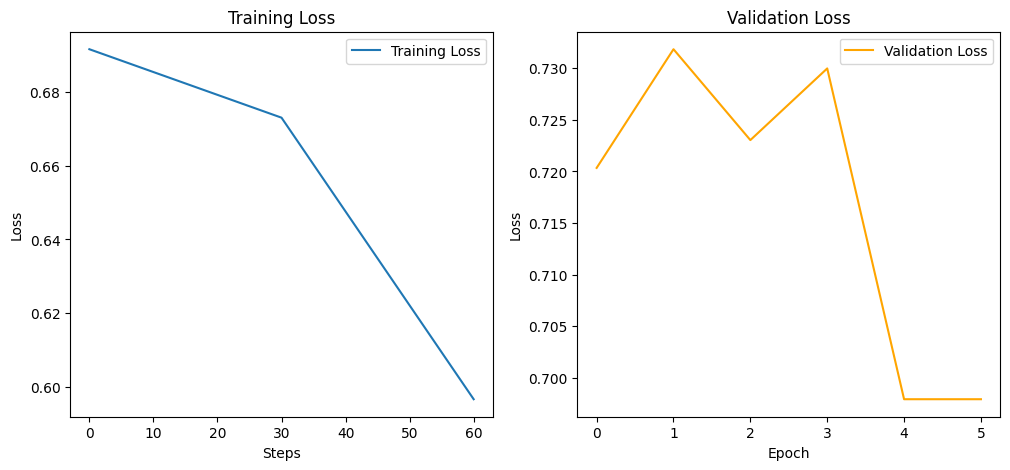

In [30]:
import matplotlib.pyplot as plt

# ログを取り出し
losses = [log['loss'] for log in custom_callback.logs if 'loss' in log]
eval_losses = [log['eval_loss'] for log in custom_callback.logs if 'eval_loss' in log]

# プロット
plt.figure(figsize=(12, 5))

# training_lossのプロット
plt.subplot(1, 2, 1)
plt.plot([i * 30 for i in range(len(losses))], losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()

# eval_lossのプロット
plt.subplot(1, 2, 2)
plt.plot([i for i in range(len(eval_losses))], eval_losses, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


/Users/riko_mogu/Library/Caches/pypoetry/virtualenvs/analysis-Zz4uMKO_-py3.12/lib/python3.12/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


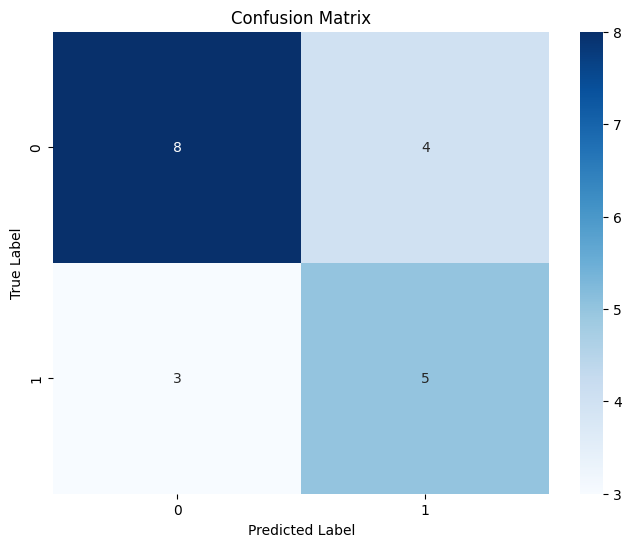

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# 予測とラベル
predictions = trainer.predict(test_dataset_wrapped)
y_true = np.array(predictions.label_ids).squeeze()
y_pred = np.argmax(predictions.predictions[0], axis=1)  # タプルになっているか確認！

# クラス名リスト
unique = sorted(set(y_true) | set(y_pred))

# 混同行列
cm = confusion_matrix(y_true, y_pred)

# プロット
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique, yticklabels=unique)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## クラス別アテンションスコア

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7ec508c035e313792a2c60be3c52d6678a7e1bb41c08bf4bfe87c0f13669c08d
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertJapaneseTokenizer'. 
The class this function is called from is 'BertTokenizer'.


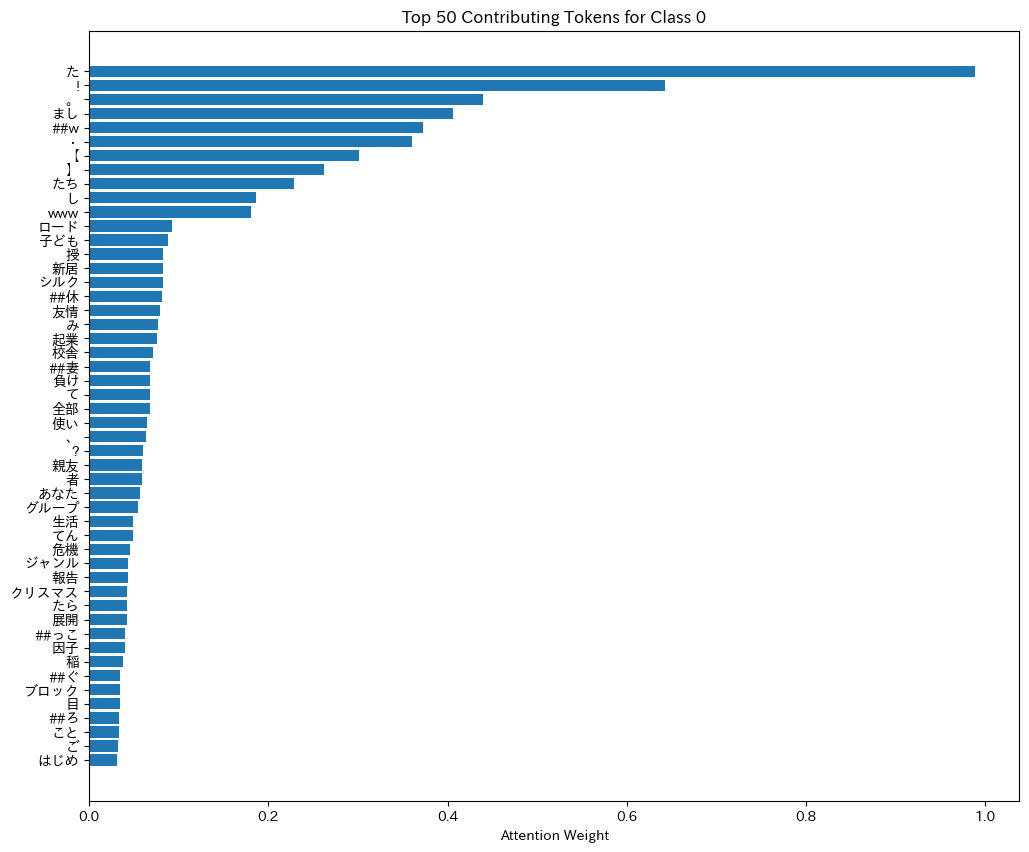

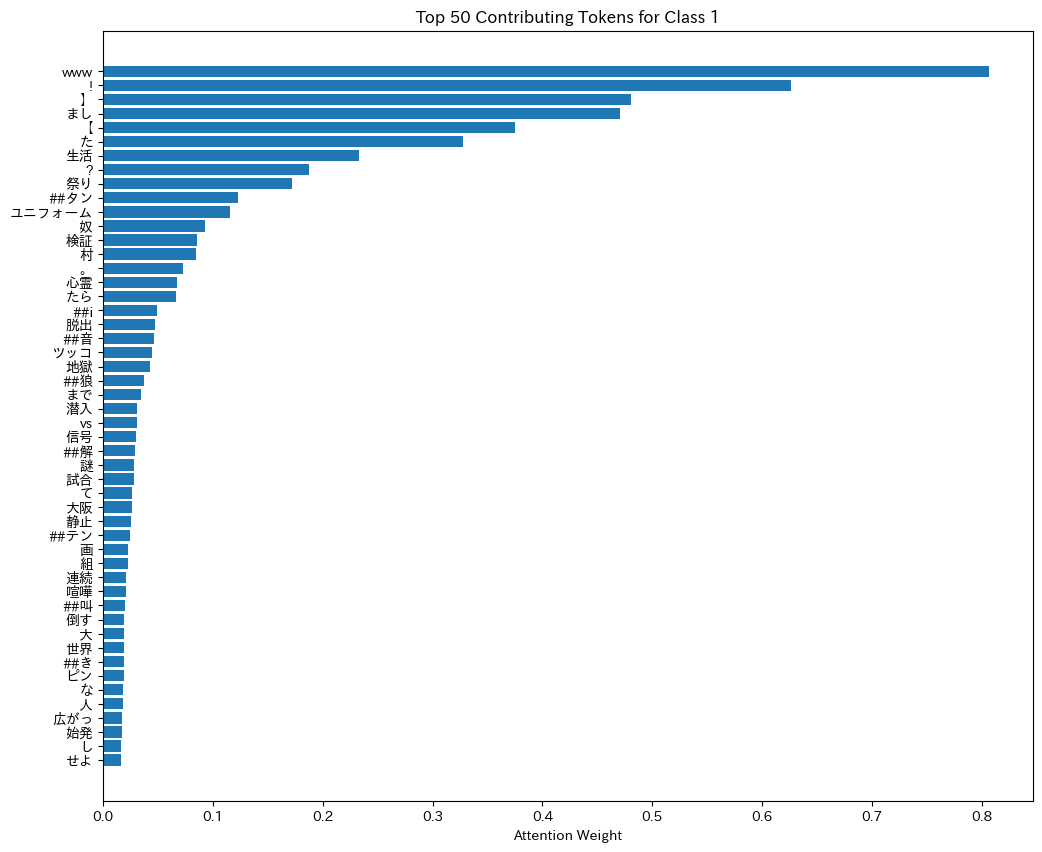

In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from transformers import BertTokenizer
import japanize_matplotlib


# トークン化のためのBERTトークナイザーを初期化
tokenizer = BertTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-whole-word-masking")

# 特別なトークンを定義
special_tokens = ['[PAD]', '[CLS]', '[SEP]', '[UNK]']
particles = ['は', 'が', 'を', 'に', 'へ', 'と', 'で', 'の', 'も', 'ね', 'よ']

def filter_tokens(attention_weights, input_ids):
    filtered_tokens = []
    filtered_weights = []

    for weight, token_id in zip(attention_weights, input_ids):
        token = tokenizer.decode([token_id])
        if token not in special_tokens and token not in particles:
            filtered_tokens.append(token)
            filtered_weights.append(weight)

    return filtered_tokens, filtered_weights

label_attention = {}
num_labels = 10
device = torch.device('cpu')  # CUDAをデバイスとして指定

model.to(device)

# ラベルごとのアテンションスコアを計算
for batch in test_dataset_wrapped:
    # バッチ内のデータをデバイスに移動
    input_ids = batch['input_ids'].unsqueeze(0).to(device)
    attention_mask = batch['attention_mask'].unsqueeze(0).to(device)
    labels = batch['label'].to(device).item()  # 各バッチのラベルを取得

    model.eval()
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask, output_attentions=True)
        attentions = outputs.attentions[-1]  # 最後の層のアテンション

    # アテンションスコアの平均化
    attention_weights = torch.mean(attentions, dim=1).squeeze(0).detach().cpu().numpy()  # (seq_len, seq_len)

    # 入力トークンIDをCPUに移動
    input_ids_cpu = input_ids.squeeze(0).detach().cpu().numpy()

    # フィルタリング
    filtered_tokens, filtered_weights = filter_tokens(attention_weights.flatten(), input_ids_cpu)

    # ラベルごとのアテンションスコアを保存
    if labels not in label_attention:
        label_attention[labels] = {
            'tokens': [],
            'weights': []
        }
    label_attention[labels]['tokens'].extend(filtered_tokens)
    label_attention[labels]['weights'].extend(filtered_weights)

# 各ラベルごとのトークンのアテンションスコアを合計
consolidated_attention = {}
for label_id, attention in label_attention.items():
    token_weight_map = {}
    for token, weight in zip(attention['tokens'], attention['weights']):
        if token in token_weight_map:
            token_weight_map[token] += weight
        else:
            token_weight_map[token] = weight

    # スコアでソートし、上位50のトークンを取得
    sorted_tokens = sorted(token_weight_map.items(), key=lambda x: x[1], reverse=True)
    consolidated_attention[label_id] = sorted_tokens[:50]  # 上位50件を保持

# 可視化
for label_id, top_tokens in sorted(consolidated_attention.items()):
    plt.figure(figsize=(12, 10))
    tokens, weights = zip(*top_tokens)  # トークンとスコアを分離

    japanize_matplotlib.japanize()
    plt.barh(range(len(weights)), weights, align='center')
    plt.yticks(range(len(weights)), tokens)
    plt.xlabel('Attention Weight')
    plt.title(f'Top 50 Contributing Tokens for Class {label_id}')
    plt.gca().invert_yaxis()
    plt.show()
